## Train and save models

In [30]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv("seattle_sample.csv")

In [32]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [45]:
y = data.log10_price

X_coords = sampled[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training

In [48]:
from sklearn.ensemble import RandomForestRegressor
# create model instance
xgb_model = RandomForestRegressor(max_depth=10, random_state=0)
# fit model
xgb_model.fit(X_train, y_train)
# make predictions
preds = xgb_model.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

-0.08515540405330468

In [37]:
import sys
sys.path.append('/Users/ziqili/Desktop/geoshapley-main/geoshapley')
from geoshapley import GeoShapleyExplainer

In [38]:

background_X = X_coords.sample(100).values

In [39]:
explainer = GeoShapleyExplainer(xgb_model.predict, background_X)

rslt = explainer.explain(X_coords)

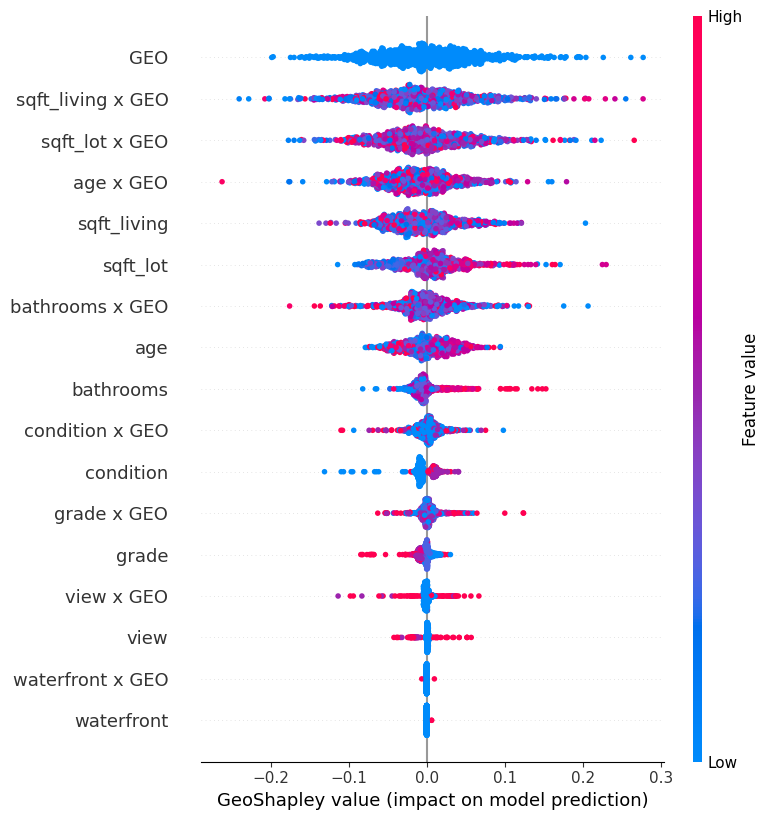

In [40]:
rslt.summary_plot(dpi=100)